In [1]:
!pip install py-hyperneat

  Created wheel for py-hyperneat: filename=py_hyperneat-0.0.1-cp36-none-any.whl size=13072 sha256=ce92038228c10f0d8f62af43eb66958deb7864b8450811ff5e9c65edc4f3e506
  Stored in directory: /root/.cache/pip/wheels/62/30/95/08e96f8c28086ca08e3fd240e55b57ac1f0d98eb21bf56685c
Successfully built py-hyperneat


# NEAT Genotype and phenotype expression
![alt text](https://i.imgur.com/Xtlzo8G.png)


In [0]:
from neat.population import Population
from neat.neural_network import NeuralNetwork
from neat.genome import Genome, Phenotype
from neat.genes import NodeGene, ConnectionGene, NodeType
from neat.neat import Neat, TrainTask
from neat.activation_functions import ActivationFunction

import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
# Select tanh function to initialize activations
tanh_function = ActivationFunction().functions['TANH']

# 10 layers
num_layers = 10

# Node genes
input_node_0 = NodeGene(0, NodeType.INPUT, tanh_function, 0)
input_node_1 = NodeGene(1, NodeType.INPUT, tanh_function, 0)
output_node = NodeGene(2, NodeType.OUTPUT, tanh_function, num_layers - 1)

nodes = [input_node_0, input_node_1, output_node]

In [0]:
# Connection genes: innovation, in node, out node, weight, enable?, in node layer, out node layer
connection_0 = ConnectionGene(0, input_node_0.gene_id, output_node.gene_id, 0.1, True, input_node_0.layer, output_node.layer)
connection_1 = ConnectionGene(1, input_node_1.gene_id, output_node.gene_id, 0.2, True, input_node_1.layer, output_node.layer)

connections = [connection_0, connection_1]

In [0]:
# Create seed genome, specify connections weight range
weights_range = (-8.0, 8.0)
genome = Genome(weights_range)

# Assemble genome from nodes and connections info. 
# Need to specify the type of phenotype to construct and number of layers
genome.create_genome_from_genes(nodes, connections, Phenotype.LAYERED_NETWORK, num_layers)

In [0]:
# Create new population
pop = Population()

# Set hyperparameters of evolution
pop.params.population_max = 100
pop.params.distance_coeff_1 = 0.6
pop.params.distance_coeff_2 = 0.6
pop.params.distance_coeff_3 = 0.06
pop.params.distance_threshold = 9.0 #Adjusted while training
pop.params.small_genome_coeff = 8
pop.params.no_crossover_offspring = 0.85

pop.params.survival_selection = True
pop.params.allow_clones = True
pop.params.survival_threshold = 0.4
pop.params.elite_offspring_param = 0.1

pop.params.min_species = 4
pop.params.max_species = 10

# Set probabilities of interspecies mating and mutations
# Interspecies probability of mate
pop.prob.interspecies_mating = 0.2

# Small organisms mutation probabilities
pop.prob.sp_new_node = 0.001
pop.prob.sp_new_connection = 0.002

# Large organisms mutation probabilities
pop.prob.lp_new_node = 0.0003
pop.prob.lp_new_connection = 0.0004

# Mutation weights and activation probabilities
pop.prob.mutation_weight = 0.1
pop.prob.mutate_activation = 0.05

# Create population of organisms from the seed genome
pop.start_population(genome)

In [0]:
# Define a fitness function.
# Current function intend to solve XOR problem, given the four possible inputs
def fitness(input_data, net):
    error = 0.0
    outputs = []

    logic = input_data[0]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[1]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(1 - net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[2]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(1 - net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[3]
    net.input(logic)
    net.activate_net()
    error += math.fabs(net.output()[0])
    outputs.append(net.output()[0])

    return math.pow(4 - error, 2)

In [0]:
# Create an instance of Neat algorithm, 100 generations
num_generations = 100
evolution = Neat(fitness_eval=fitness, train_task=TrainTask.PREDICTION, max_generation=num_generations)

# Set population to evolutionary algorithm. Limit activation functions to tanh for this example
evolution.pop = pop
evolution.pop.activation_set.use_only_tanh()

In [9]:
# Define input sets to fit with fitness function
xor_eval = [[0, 0], [0, 1], [1, 0], [1, 1]]

# Run training
evolution.set_multi_input(xor_eval)
avg, best = evolution.run_multiple_trainings(5)

Iteration #0: species = 6, champion_fitness = 15.941865, avg_generation_fitness = 8.259464
Iteration #1: species = 8, champion_fitness = 15.684336, avg_generation_fitness = 8.083922
Iteration #2: species = 7, champion_fitness = 15.848229, avg_generation_fitness = 8.118714
Iteration #3: species = 4, champion_fitness = 15.770745, avg_generation_fitness = 8.031041
Iteration #4: species = 6, champion_fitness = 15.951838, avg_generation_fitness = 7.916029


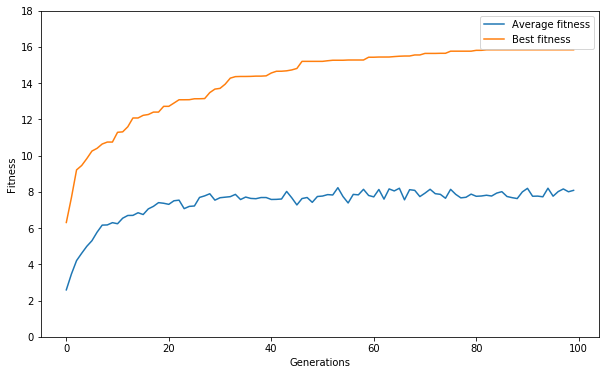

In [10]:
generations = np.linspace(0, 99, 100)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(generations, avg, label='Average fitness')
ax.plot(generations, best, label='Best fitness') # primer gráfico (primera sub-figura)
ax.set_ylabel('Fitness')
ax.set_xlabel('Generations')
ax.set_ylim(0, 18)
leg = ax.legend();

In [11]:
# Let's change activation functions set
evolution.pop.activation_set = ActivationFunction()
evolution.pop.activation_set.set_atemporal_set()
evolution.pop.activation_set.unset_lin_group()

# Run training
evolution.pop.restart_population()
avg, best = evolution.run_multiple_trainings(5)

Iteration #0: species = 6, champion_fitness = 16.000000, avg_generation_fitness = 7.195489
Iteration #1: species = 10, champion_fitness = 16.000000, avg_generation_fitness = 8.614111
Iteration #2: species = 9, champion_fitness = 16.000000, avg_generation_fitness = 9.441602
Iteration #3: species = 6, champion_fitness = 16.000000, avg_generation_fitness = 9.956438
Iteration #4: species = 10, champion_fitness = 16.000000, avg_generation_fitness = 7.783131


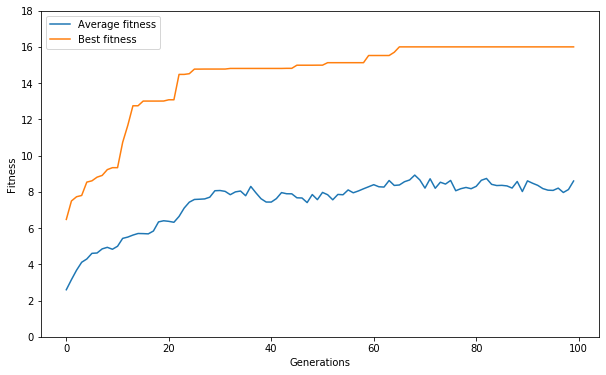

In [12]:
generations = np.linspace(0, 99, 100)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(generations, avg, label='Average fitness')
ax.plot(generations, best, label='Best fitness') # primer gráfico (primera sub-figura)
ax.set_ylabel('Fitness')
ax.set_xlabel('Generations')
ax.set_ylim(0, 18)
leg = ax.legend();

In [0]:
champion_connections = evolution.pop.champion_genome.export_genome()['GeneticEncoding']['connections']
champion_nodes = evolution.pop.champion_genome.export_genome()['GeneticEncoding']['nodes']

# Champion genome can be saved to champion.json by calling save_genome() method
# Let's see how many nodes result
print('Nodes {:d}, Connections {:d}'.format(len(champion_nodes), len(champion_connections)))

In [0]:
node_types = {0: 'INPUT', 1: 'HIDDEN', 2: 'OUTPUT'}

def node_printer(nodes):
    for node in nodes:
        print('Node id {:d}, layer {:d}, type {:s}, activation {:s}'.format(node['nodeID'], 
                                                                            node['row'],
                                                                            node_types[node['type']],
                                                                            node['function']))
def connection_printer(connections):
    for connection in connections:
        print('Connection innovation {:d}, in_id {:d}, out_id {:d}, weigh {:f}, enable {:b}'.format(connection['innovation'],
                                                                                                    connection['in'],
                                                                                                    connection['out'],
                                                                                                    connection['weight'],
                                                                                                    connection['enable']))

In [0]:
# Print champion nodes
node_printer(champion_nodes)

In [0]:
# Print champion connections
connection_printer(champion_connections)

#CPPN: Compositional Pattern Producing Network
Mixed activation functions produce different connectivity patterns from a node to a target space. Using NEAT as learning algorithm diverse patterns can be obtained in evolution

![alt text](https://i.imgur.com/bNYVnCC.png)

#HyperNEAT and ES-HyperNEAT
Connection mapping in a 2D substrate using NEAT

![alt text](https://i.imgur.com/hfKTMPx.png)

2D layers can be connected between them. In a feed-forward approach connection mapping can be generated as
![alt text](https://i.imgur.com/B13GNVt.png)

ES-HyperNEAT does not declare any nodes position in the hidden layers, the algorithm search for relevant activations from an input node across the target space.

![alt text](https://i.imgur.com/p62nCoY.png)

#HyperNEAT learning gaits

In [20]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/QyVUIM5fVLA?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

In [21]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/uvqSYnoox4s?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

#ES-HyperNEAT learning gaits

In [18]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/fEHyarE8SXM?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

In [22]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/aYHlDjhvi7A?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

P. Reyes and M. Escobar, "Neuroevolutive Algorithms for Learning Gaits in Legged Robots," in IEEE Access, vol. 7, pp. 142406-142420, 2019.